<a href="https://colab.research.google.com/github/Aman-Kr-Gupta/Pred_Airline_Prices/blob/main/Airline_price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Data_Train.xlsx to Data_Train (1).xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('Data_Train.xlsx')

In [4]:
df.shape

(10683, 11)

In [5]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#As there is only one null value in Route and Total Stops column out of 10683 values we can simply drop them
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])
for feature in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

<ipython-input-11-de1b7f23106c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df[col]=pd.to_datetime(df[col])


In [12]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

**Doing Feature Engineering on Date_of_Journey , Dep_Time and Arrival_Time**

In [13]:
df['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [14]:
df['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [15]:
##it means our data belongs to 2019 year only, hence extracting year feature & consider this as a input to my machine learning model makes no sense
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month

In [16]:
df.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-10 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-10 05:50:00,2023-07-10 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-10 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-07-10 18:05:00,2023-07-10 23:30:00,5h 25m,1 stop,No info,6218,5,12


In [17]:
#we have derived journey_day and journey_month from date_of_journey column hence we no longer need Date_of_Journey
df.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
def extract_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)
    return df.head(2)

In [19]:
# Departure_Time
extract_hour_min(df,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-10 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50


In [20]:
#Arrival_Time
extract_hour_min(df,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


#Data Analysis:
-> Analyse the Departure Time of the flight.

-> Analyse the Arrival time of the flight.

In [21]:
def time_(x):
   # This function takes the flight Departure/Arrival time and convert into appropriate format.
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'

    elif ( x>8 ) and (x<=12 ):
        return 'Morning'

    elif ( x>12 ) and (x<=16 ):
        return 'Noon'

    elif ( x>16 ) and (x<=20 ):
        return 'Evening'

    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

Plot of Departure time of the Flight

<Axes: >

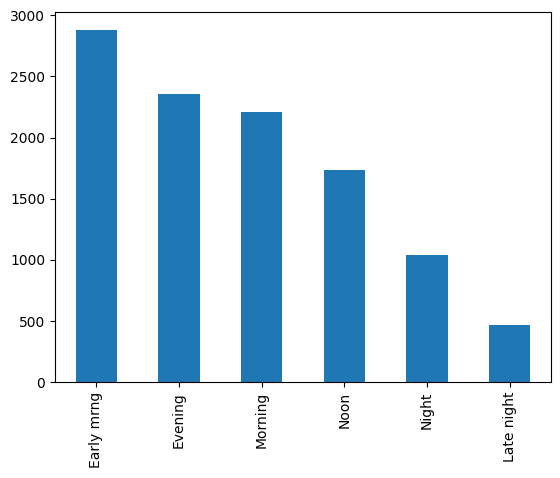

In [22]:
df['Dep_Time_hour'].apply(time_).value_counts().plot(kind='bar')

Plot of Arrival Time of the Flight

<Axes: >

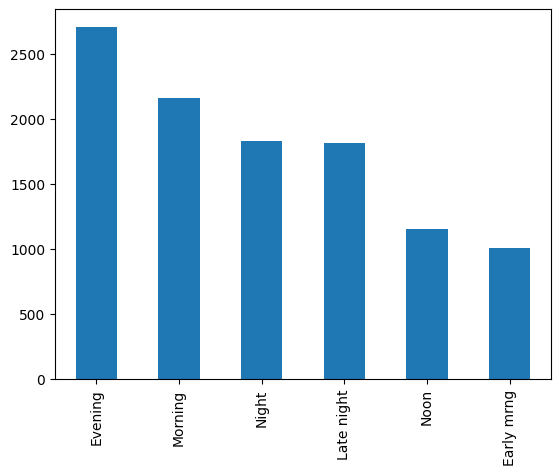

In [23]:
df['Arrival_Time_hour'].apply(time_).value_counts().plot(kind='bar')

PreProcessing on Duration of Flight and extracting the meaningful features.

In [24]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [25]:
df['Duration']=df['Duration'].apply(preprocess_duration)

In [26]:
df['Duration_hours']=df['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))
df['Duration_mins']=df['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [27]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0


**Lets Analyse whether the duration of flight impacts price or not?**

In [28]:
df['Duration_total_mins']=df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [29]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0,1140


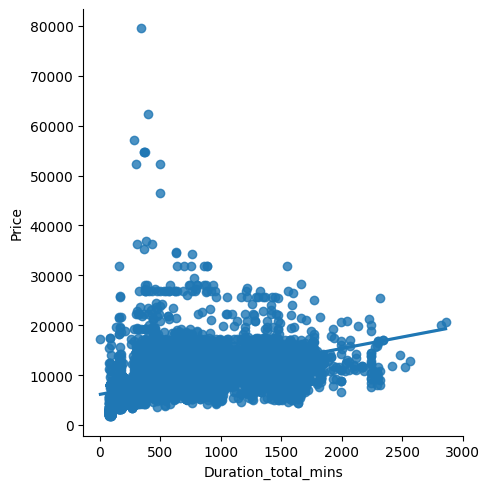

In [30]:
import seaborn as sns
sns.lmplot(x='Duration_total_mins',y='Price',data=df)

**From the graph it is quite clear that the duration of the flight impacts the Prices of the Flight**

In [31]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<Axes: ylabel='Destination'>

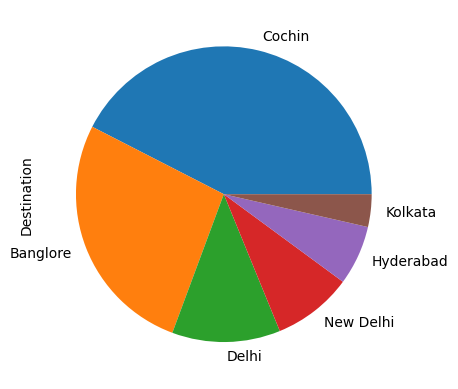

In [32]:
df['Destination'].value_counts().plot(kind='pie')

# Airline V/s Price Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

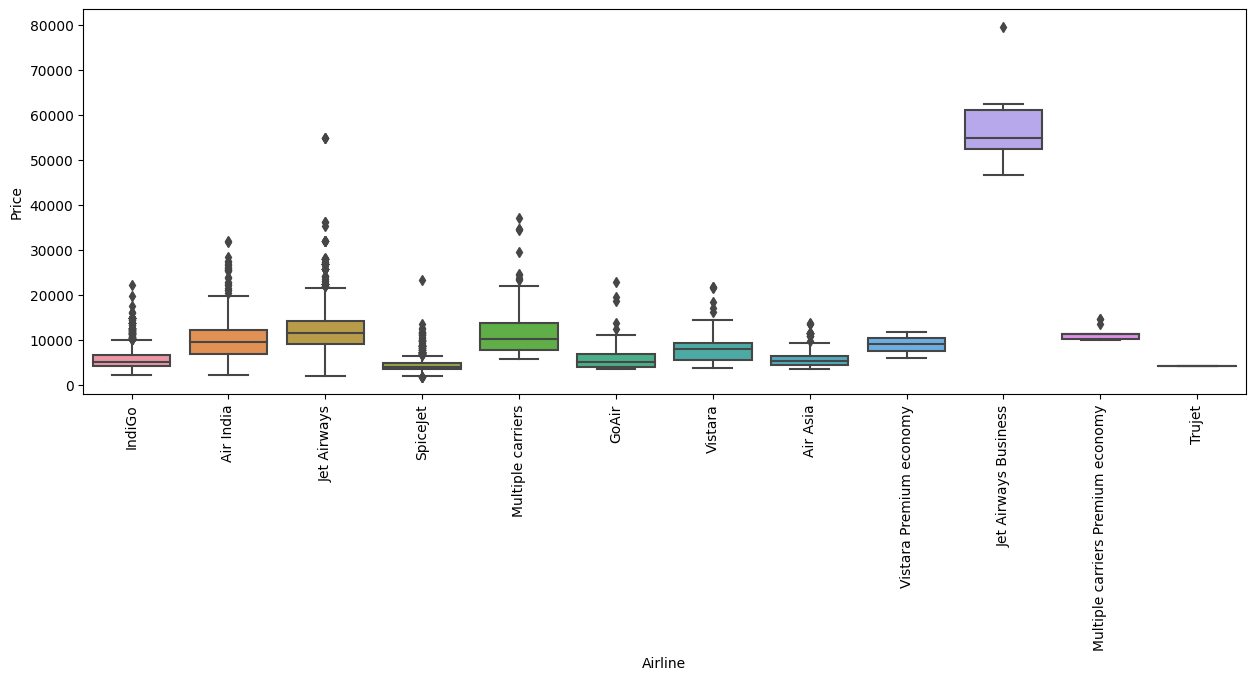

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=df)
plt.xticks(rotation='vertical')

# Feature Encoding

In [34]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0,1140


In [35]:
df.drop(columns=['Additional_Info','Route','Duration_total_mins'],axis=1,inplace=True)

In [36]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0


In [37]:
cat_col=[col for col in df.columns if df[col].dtype=='object']

In [38]:
num_col=[col for col in df.columns if df[col].dtype!='object']

In [39]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

#### Lets apply one-hot encoding on 'Source' feature !

In [40]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [41]:
for category in df['Source'].unique():
    df['Source_'+category]=df['Source'].apply(lambda x: 1 if x==category else 0)

In [42]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [43]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

## Performing Target Guided Mean Encoding !
we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality in ML..

In [44]:
airlines=df.groupby(['Airline'])['Price'].mean().sort_values().index

In [45]:
dict1={key:index for index,key in enumerate(airlines,0)}

In [46]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [47]:
df['Airline']=df['Airline'].map(dict1)

In [48]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


In [49]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Delhi and New Delhi are same cities so lets merge them.

In [50]:
df['Destination'].replace('New Delhi','Delhi',inplace=True)

In [51]:
dest=df.groupby(['Destination'])['Price'].mean().sort_values().index

In [52]:
dict2={key:index for index,key in enumerate(dest,0)}

In [53]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [54]:
df['Destination']=df['Destination'].map(dict2)

In [55]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [56]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(stops)

In [57]:
df.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [58]:

df.drop(['Source','Duration'],axis=1,inplace=True)

In [59]:
df.head(3)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,4,2,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


###All the categorical columns has been converted to Numerical columns
###Now Lets Perform Outlier Detection and Removal

In [60]:
def plot(df,col):
    fig,(ax1,ax2,ax3)=plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    sns.distplot(df[col],ax=ax3,kde=False)

<ipython-input-60-903dc4392654>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
<ipython-input-60-903dc4392654>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax3,kde=False)


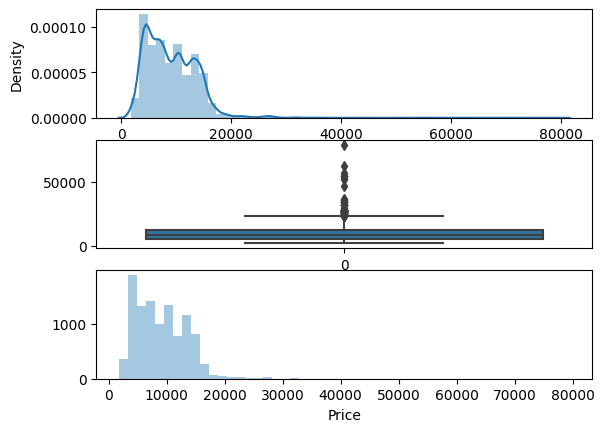

In [61]:
plot(df,'Price')

In [62]:
df['Price']=np.where(df['Price']>=35000,df['Price'].median(),df['Price'])

<ipython-input-60-903dc4392654>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
<ipython-input-60-903dc4392654>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax3,kde=False)


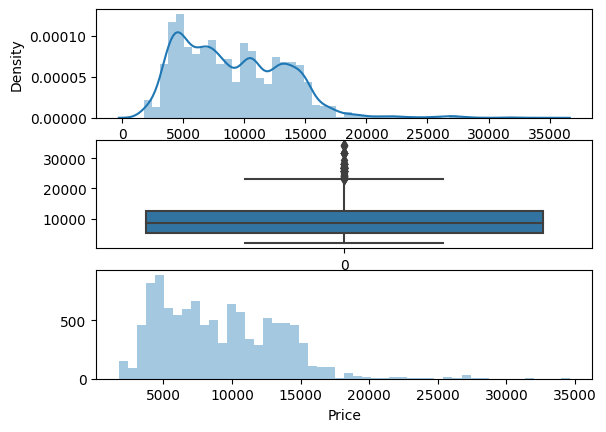

In [63]:
plot(df,'Price')

In [64]:
df.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
Duration_hours           int64
Duration_mins            int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

##Feature Selection:

In [65]:
x=df.drop(['Price'],axis=1)

In [66]:
y=df['Price']

In [67]:
from sklearn.feature_selection import mutual_info_regression

In [69]:
mutual_info_regression(x,y)

array([0.97634784, 0.99505508, 0.78846305, 0.19152785, 0.24511606,
       0.32695214, 0.26074832, 0.39635988, 0.35671932, 0.46617611,
       0.35092631, 0.38365003, 0.45296122, 0.52831388, 0.13158566,
       0.2024339 ])

In [72]:
imp=pd.DataFrame(mutual_info_regression(x,y),index=x.columns)
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.000681
Airline,0.976049
Total_Stops,0.795503
Source_Delhi,0.524414
Duration_hours,0.471524
Source_Kolkata,0.458740
Arrival_Time_hour,0.391086
Source_Banglore,0.389785
Arrival_Time_minute,0.351122
Duration_mins,0.346637


We will not drop any feature as we already have less features and none of them is independent to y


#Building Model

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
ml_model=RandomForestRegressor()

In [102]:
model=ml_model.fit(x_train,y_train)

In [103]:
y_pred=model.predict(x_test)

In [104]:
from sklearn import metrics
print('Mean Squared Error (MSE) : ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error (MSE) :  3774432.6423398573


In [105]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8061172046268057

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
import pickle

In [112]:
import pickle as cPickle
with open('/content/drive/MyDrive/30daysmlchallenge/rf.pkl', 'wb') as f:
    cPickle.dump(ml_model, f)
# in your prediction file

with open('/content/drive/MyDrive/30daysmlchallenge/rf.pkl', 'rb') as f:
    rf = cPickle.load(f)


preds = rf.predict(x_test)

##Lets Automate ML model:

In [113]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [114]:
def predict(ml_model):

    model=ml_model.fit(x_train,y_train)
    print('Training_score: {}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')

    from sklearn import metrics
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2_score: {}'.format(r2_score))
    print('MSE : ', metrics.mean_squared_error(y_test,y_prediction))
    print('MAE : ', metrics.mean_absolute_error(y_test,y_prediction))
    print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    print('MAPE : ', mape(y_test,y_prediction))
    sns.distplot(y_test-y_prediction)

Training_score: 0.9511304471061538
Predictions are : [16709.87  6241.37  8813.98 ...  3470.78  6250.61  6873.95]


r2_score: 0.8094978507081492
MSE :  3708619.577817759
MAE :  1182.2759975321487
RMSE :  1925.7776553428382
MAPE :  13.214997159056471


<ipython-input-114-b98780f80ac4>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_prediction)


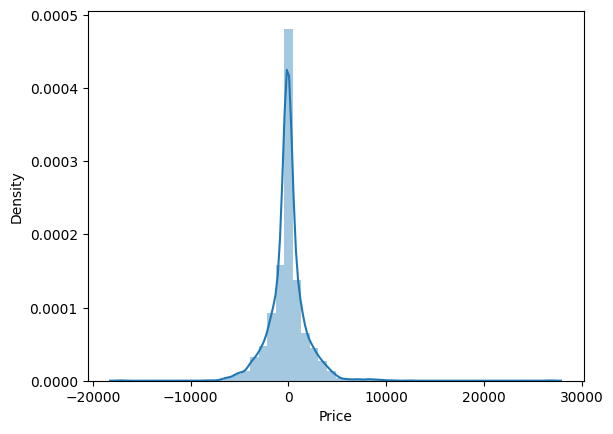

In [115]:
predict(RandomForestRegressor())